# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [2]:
df = pd.read_excel('richpeople.xlsx')
df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

(1653, 30)

In [4]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [6]:
df[['name','networthusbillion']].sort_values('networthusbillion', ascending=False).head(10)

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [7]:
male_num = len(df[df['gender']== 'male'])
female_num = len(df[df['gender']== 'female'])
f'There are {male_num} male billionaires and {female_num} female billionaires.' 

'There are 1473 male billionaires and 180 female billionaires.'

In [8]:
df.gender.value_counts()

gender
male      1473
female     180
Name: count, dtype: int64

## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [9]:
df.gender.value_counts(normalize=True)

gender
male      0.891107
female    0.108893
Name: proportion, dtype: float64

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [10]:
df[['gender', 'networthusbillion']].groupby('gender').mean('networthusbillion')

,networthusbillion
gender,
female,3.920556
male,3.902716


## 5a) What is the most common source/type of wealth?

In [11]:
df.typeofwealth.value_counts().head(1)

typeofwealth
inherited    506
Name: count, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [12]:
df.groupby(['gender']).value_counts(['typeofwealth'], normalize=True)

gender  typeofwealth            
female  inherited                   0.788889
        founder non-finance         0.116667
        executive                   0.033333
        self-made finance           0.033333
        privatized and resources    0.027778
male    founder non-finance         0.303195
        inherited                   0.247451
        self-made finance           0.229776
        privatized and resources    0.127124
        executive                   0.092454
Name: proportion, dtype: float64

## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [13]:
df.value_counts(['company']).head(5)

company            
Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Walmart                 6
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

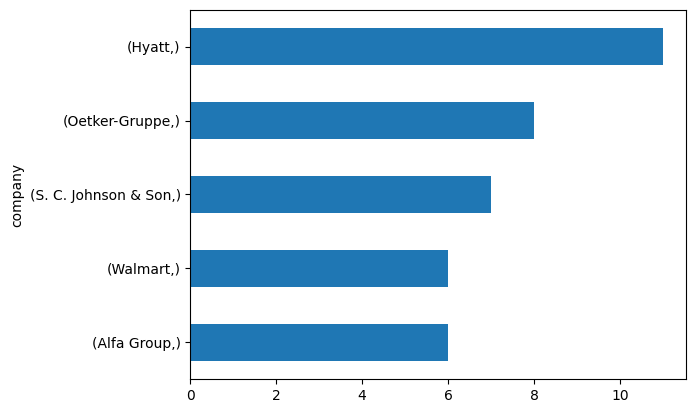

In [14]:
df.value_counts(['company']).head(5).sort_values().plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

## 9a) How old is an average billionaire?

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

## 10a) Who are the three youngest billionaires? Who are the three oldest?

## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.